<a href="https://colab.research.google.com/github/jb19074/Finance-App-Reviews/blob/main/EndowusAppReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vaderSentiment
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import vaderSentiment

from google_play_scraper import app
from google_play_scraper import Sort, reviews_all, reviews

vds = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
us_reviews = reviews_all(
    'com.endowus.mobileapp',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='sg', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [5]:
df = pd.DataFrame(np.array(us_reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))

df.head(25)

reviewId              userName  \
0   9ee90a46-59d0-4a5e-a033-8802497ae799      Aaron Yi Rui Low   
1   466b151c-1c8a-4702-a2c0-733abd576e3d            Leslie Low   
2   3e494e07-7cac-4aab-8756-214b6d593da1         Handi Solikin   
3   1894e61c-b093-402c-af3a-ecb8b9c99868        nyinyi winhtet   
4   4fb8274e-8c4a-497d-b42a-d0afbf621a2d           silverspoon   
5   be6da265-0063-4810-a144-7af51ff0b104               d. wong   
6   0265dd0d-d884-497a-83ce-e098ee6d6c2e                   S c   
7   0692ef98-94e7-4d1a-9dc4-49b3a5e0e6d6              Anderson   
8   5de9ad55-a32f-4610-a017-cc5ffa0fb1af         Jyotman Singh   
9   d37ee4c0-174e-4712-8977-3bc7958c0961               kebbe80   
10  22b18b07-0359-4f8b-8935-942495a7b435          Md rubel Ali   
11  4aafb766-9ff2-4db5-9fe6-488a39f02e31                Kc Tan   
12  638b7927-4b38-4bbf-bec0-ba21e3c15fd4                   N T   
13  14f80d63-b8f2-4864-aead-6b9f9ad0efce                   Ken   
14  ed6cd0cf-bc98-474c-8af0-ca5d8533569c            Jeremy Soh   
15  d9d39ea3-891d-4b24-9e47-b109a8dd99f6           Led EcoLite   
16  eb8392ce-c2d7-4256-a150-5edc3174fc04            Shanna Ooi   
17  d0c106ef-7cb3-4b9e-baa0-d4e5c153baaa                   E L   
18  f74ff6d2-c127-4643-848c-5f56d26f3d69             Vincent L   
19  95c8b0f0-ec66-4a49-ba2f-f58c634b5109             MaP Undey   
20  b56ed0a6-af79-41fd-9006-e9de70600b9b           Star Lonerz   
21  6f8f322e-66f9-46d1-9c25-d62c225e1b59  Mohammad farid Rahim   
22  bd9be32e-50f3-47d8-9d49-91bdb8eab067           Si wei pang   
23  b0136065-aea8-44ab-bd44-fb03294af590          Isabelle Lee   
24  a8cb8f64-fecd-40f5-bf11-a4731168aed7                 CH Ho   

                                            userImage  \
0   https://play-lh.googleusercontent.com/a/AEdFTp...   
1   https://play-lh.googleusercontent.com/a/AEdFTp...   
2   https://play-lh.googleusercontent.com/a-/AD5-W...   
3   https://play-lh.googleusercontent.com/a-/AD5-W...   
4   https://play-lh.googleusercontent.com/a-/AD5-W...   
5   https://play-lh.googleusercontent.com/a/AEdFTp...   
6   https://play-lh.googleusercontent.com/a/AEdFTp...   
7   https://play-lh.googleusercontent.com/a-/AD5-W...   
8   https://play-lh.googleusercontent.com/a/AEdFTp...   
9   https://play-lh.googleusercontent.com/a/AEdFTp...   
10  https://play-lh.googleusercontent.com/a-/AD5-W...   
11  https://play-lh.googleusercontent.com/a-/AD5-W...   
12  https://play-lh.googleusercontent.com/a/AEdFTp...   
13  https://play-lh.googleusercontent.com/a-/AD5-W...   
14  https://play-lh.googleusercontent.com/a-/AD5-W...   
15  https://play-lh.googleusercontent.com/a/AEdFTp...   
16  https://play-lh.googleusercontent.com/a-/AD5-W...   
17  https://play-lh.googleusercontent.com/a/AEdFTp...   
18  https://play-lh.googleusercontent.com/a/AEdFTp...   
19  https://play-lh.googleusercontent.com/a-/AD5-W...   
20  https://play-lh.googleusercontent.com/a/AEdFTp...   
21  https://play-lh.googleusercontent.com/a/AEdFTp...   
22  https://play-lh.googleusercontent.com/a/AEdFTp...   
23  https://play-lh.googleusercontent.com/a/AEdFTp...   
24  https://play-lh.googleusercontent.com/a/AEdFTp...   

                                              content  score  thumbsUpCount  \
0   Fair fees. Transparent. Interest aligned with ...      5              0   
1                                Unable to update app      1              0   
2   The biometric login option does not appear all...      3              0   
3                                                Good      5              0   
4   Have used some robo-advising investing apps bu...      5              1   
5              Kudos to the product, dev and UX team!      5              0   
6   Make great losses. Lost more than sgd5000 and ...      1              2   
7   App is simple, fuss free, easy to use. The use...      5              1   
8            The app I trust for my wealth management      5              0   
9                                         

In [6]:
content = " ".join(content for content in df.content)

In [7]:
stop_words = ['invest', 'investing', 'investment', 'Endowus', 'app', 'use', 'money'] + list(STOPWORDS)

In [8]:
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(content)

(-0.5, 2999.5, 1999.5, -0.5)

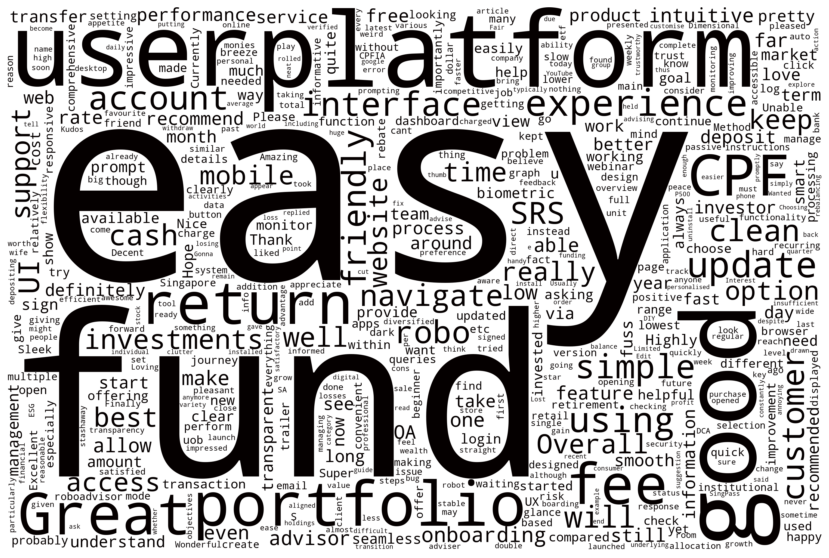

In [9]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

In [10]:
#@title Compound Scores
df['compound'] = [vds.polarity_scores(x)['compound'] for x in df['content']]
df['neg'] = [vds.polarity_scores(x)['neg'] for x in df['content']]
df['neu'] = [vds.polarity_scores(x)['neu'] for x in df['content']]
df['pos'] = [vds.polarity_scores(x)['pos'] for x in df['content']]

for sentence in df['content']:
    vs = vds.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
  

In [11]:
#df['scores'] = df['content'].apply(lambda review: vds.polarity_scores(content))
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

reviewId          userName  \
0  9ee90a46-59d0-4a5e-a033-8802497ae799  Aaron Yi Rui Low   
1  466b151c-1c8a-4702-a2c0-733abd576e3d        Leslie Low   
2  3e494e07-7cac-4aab-8756-214b6d593da1     Handi Solikin   
3  1894e61c-b093-402c-af3a-ecb8b9c99868    nyinyi winhtet   
4  4fb8274e-8c4a-497d-b42a-d0afbf621a2d       silverspoon   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AEdFTp...   
1  https://play-lh.googleusercontent.com/a/AEdFTp...   
2  https://play-lh.googleusercontent.com/a-/AD5-W...   
3  https://play-lh.googleusercontent.com/a-/AD5-W...   
4  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                             content  score  thumbsUpCount  \
0  Fair fees. Transparent. Interest aligned with ...      5              0   
1                               Unable to update app      1              0   
2  The biometric login option does not appear all...      3              0   
3                                               Good      5              0   
4  Have used some robo-advising investing apps bu...      5              1   

  reviewCreatedVersion                  at  \
0                1.9.4 2022-10-21 13:23:26   
1                 None 2022-10-20 23:15:02   
2                1.8.9 2022-09-20 12:21:44   
3                1.7.9 2022-08-13 06:12:15   
4                1.8.5 2022-08-06 04:26:42   

                                        replyContent           repliedAt  \
0  Hi Aaron, we’re really glad to hear that you h... 2022-11-02 06:27:41   
1  Hi Leslie, thank you for your feedback. We und... 2022-11-08 09:28:12   
2  Hi Handi, we take your feedback seriously and ... 2022-09-27 09:56:19   
3                                               None                 NaT   
4  Hello there, we’re really glad to hear that yo... 2022-08-11 08:01:23   

   compound  neg    neu    pos comp_score  
0    0.8689  0.0  0.597  0.403        pos  
1    0.0000  0.0  1.000  0.000        pos  
2    0.0000  0.0  1.000  0.000        pos  
3    0.4404  0.0  0.000  1.000        pos  
4    0.9657  0.0  0.733  0.267        pos

In [12]:
pos_content = df[df.comp_score == 'pos']
neg_content = df[df.comp_score == 'neg']

In [13]:
pos_content.head(3)

reviewId          userName  \
0  9ee90a46-59d0-4a5e-a033-8802497ae799  Aaron Yi Rui Low   
1  466b151c-1c8a-4702-a2c0-733abd576e3d        Leslie Low   
2  3e494e07-7cac-4aab-8756-214b6d593da1     Handi Solikin   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AEdFTp...   
1  https://play-lh.googleusercontent.com/a/AEdFTp...   
2  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                             content  score  thumbsUpCount  \
0  Fair fees. Transparent. Interest aligned with ...      5              0   
1                               Unable to update app      1              0   
2  The biometric login option does not appear all...      3              0   

  reviewCreatedVersion                  at  \
0                1.9.4 2022-10-21 13:23:26   
1                 None 2022-10-20 23:15:02   
2                1.8.9 2022-09-20 12:21:44   

                                        replyContent           repliedAt  \
0  Hi Aaron, we’re really glad to hear that you h... 2022-11-02 06:27:41   
1  Hi Leslie, thank you for your feedback. We und... 2022-11-08 09:28:12   
2  Hi Handi, we take your feedback seriously and ... 2022-09-27 09:56:19   

   compound  neg    neu    pos comp_score  
0    0.8689  0.0  0.597  0.403        pos  
1    0.0000  0.0  1.000  0.000        pos  
2    0.0000  0.0  1.000  0.000        pos

In [14]:
neg_content.head(3)

reviewId   userName  \
6   0265dd0d-d884-497a-83ce-e098ee6d6c2e        S c   
17  d0c106ef-7cb3-4b9e-baa0-d4e5c153baaa        E L   
18  f74ff6d2-c127-4643-848c-5f56d26f3d69  Vincent L   

                                            userImage  \
6   https://play-lh.googleusercontent.com/a/AEdFTp...   
17  https://play-lh.googleusercontent.com/a/AEdFTp...   
18  https://play-lh.googleusercontent.com/a/AEdFTp...   

                                              content  score  thumbsUpCount  \
6   Make great losses. Lost more than sgd5000 and ...      1              2   
17    Returns are terrible, app keeps losing my money      1              2   
18  Dark mode only work on preference page. this i...      2              1   

   reviewCreatedVersion                  at  \
6                 1.8.4 2022-07-29 15:13:57   
17                1.7.1 2022-03-11 15:01:23   
18                1.7.1 2022-03-10 18:18:12   

                                         replyContent           repliedAt  \
6   Hi there, we take your feedback seriously and ... 2022-08-11 08:05:26   
17                                               None                 NaT   
18                                               None                 NaT   

    compound    neg    neu    pos comp_score  
6    -0.5200  0.194  0.673  0.133        neg  
17   -0.6908  0.487  0.513  0.000        neg  
18   -0.1779  0.159  0.841  0.000        neg

# Negative Review Word Cloud

In [15]:
negative_review = " ".join(content for content in neg_content.content)
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(negative_review)

(-0.5, 2999.5, 1999.5, -0.5)

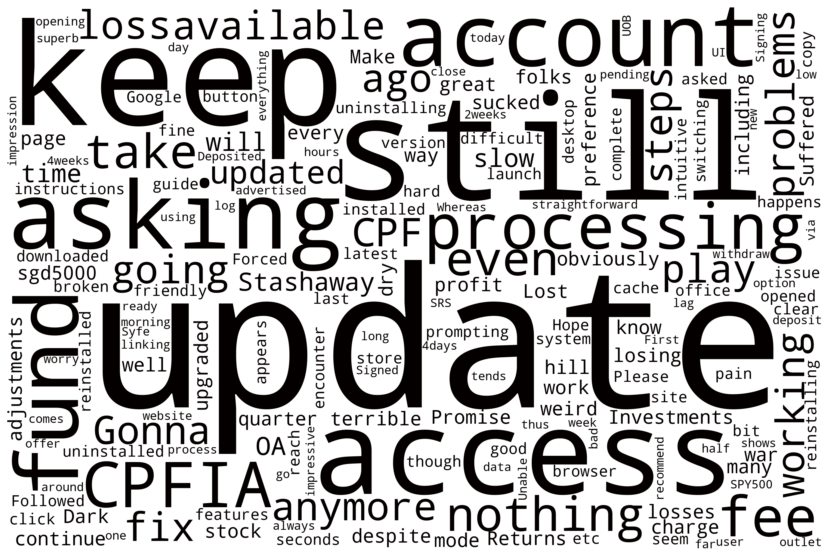

In [16]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

# Postive Review Word Cloud

In [17]:
positive_review = " ".join(content for content in pos_content.content)
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(positive_review)

(-0.5, 2999.5, 1999.5, -0.5)

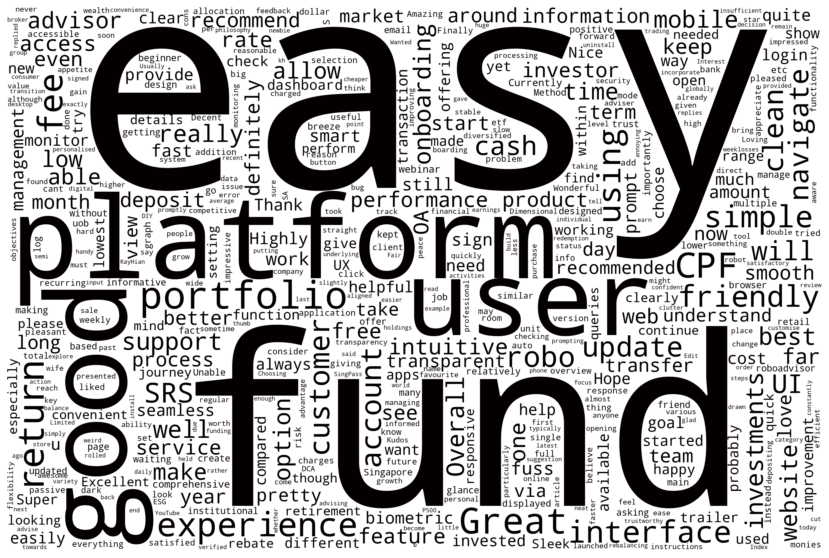

In [18]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

# Text Processing

In [19]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [20]:
# Clean the data
df["content"] = df["content"].str.lower()
df["content"] = df["content"].str.replace(r"[^a-zA-Z0-9]", " ")
df["content"] = df["content"].str.strip()

#text_data = df["content"].tolist()
text_data = df['content'].values.tolist()
text_data

<ipython-input-20-48b00e25e6f8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["content"] = df["content"].str.replace(r"[^a-zA-Z0-9]", " ")


['fair fees  transparent  interest aligned with investors  it seems   a breath of fresh air in the murky world of wealth management',
 'unable to update app',
 'the biometric login option does not appear all the time  occasionally have to use id and pw',
 'good',
 'have used some robo advising investing apps but none of them struck out to me as trustworthy or consumer oriented  if you read the articles and watch the webinars of endowus  you can tell they re pretty down to earth and geniuinely want to make investing easier and more accessible  will stick with them for quite some time  thank you endowus for putting us first',
 'kudos to the product  dev and ux team',
 'make great losses  lost more than sgd5000 and endowus continue to charge me  50 access fee every quarter despite the loss  suffered both stock loss and  300 over access fee for nothing  promise profit but have been sucked dry  not going to invest in endowus anymore',
 'app is simple  fuss free  easy to use  the user design

In [21]:
import string

text_data = [text.translate(str.maketrans("", "", string.punctuation)) for text in text_data]
text_data = [text.translate(str.maketrans("", "", string.digits)) for text in text_data]

text_data

['fair fees  transparent  interest aligned with investors  it seems   a breath of fresh air in the murky world of wealth management',
 'unable to update app',
 'the biometric login option does not appear all the time  occasionally have to use id and pw',
 'good',
 'have used some robo advising investing apps but none of them struck out to me as trustworthy or consumer oriented  if you read the articles and watch the webinars of endowus  you can tell they re pretty down to earth and geniuinely want to make investing easier and more accessible  will stick with them for quite some time  thank you endowus for putting us first',
 'kudos to the product  dev and ux team',
 'make great losses  lost more than sgd and endowus continue to charge me   access fee every quarter despite the loss  suffered both stock loss and   over access fee for nothing  promise profit but have been sucked dry  not going to invest in endowus anymore',
 'app is simple  fuss free  easy to use  the user design is amazi

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("english"))
stop_words = ['invest', 'investing', 'investment', 'Endowus', 'endowus', 'easy', 'great', 'good', 'bad', 'App', 'app', 'use', 'money'] + list(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
from tqdm import tqdm
reviews_processed = []
for sentence in tqdm(text_data):
    reviews_processed.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stop_words))

text_data = reviews_processed
text_data

100%|██████████| 310/310 [00:00<00:00, 3561.89it/s]


['fair fees transparent interest aligned investors seems breath fresh air murky world wealth management',
 'unable update',
 'biometric login option appear time occasionally id pw',
 '',
 'used robo advising apps none struck trustworthy consumer oriented read articles watch webinars tell pretty earth geniuinely want make easier accessible stick quite time thank putting us first',
 'kudos product dev ux team',
 'make losses lost sgd continue charge access fee every quarter despite loss suffered stock loss access fee nothing promise profit sucked dry going anymore',
 'simple fuss free user design amazing kudos team',
 'trust wealth management',
 '',
 '',
 'platform highly recommended one suggestion please explore whether keep login details update instead asking entered really quite annoying think using',
 'job making transactions faster day purchase pm cut time',
 'slow word keeps coming mind pretty much action platform takes working days get verified even though singpass deposit takes w

In [24]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Lemmatize the text data

#text_data = [[lemmatizer.lemmatize(word, pos_tag([word])[0][1]) for word in text] for text in text_data]
#text_data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [25]:
# Perform vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#text_data = vectorizer.fit_transform(text_data.apply(lambda text_data: " ".join(text_data)))

from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Vectorize the text data
X = vectorizer.fit_transform(text_data)
print(X)

  (0, 712)	0.2100482905025788
  (0, 1316)	0.26428279148079636
  (0, 1352)	0.27848461117709444
  (0, 760)	0.2985009518180542
  (0, 49)	0.2985009518180542
  (0, 473)	0.2985009518180542
  (0, 144)	0.2985009518180542
  (0, 1052)	0.2985009518180542
  (0, 624)	0.21904884397561486
  (0, 50)	0.27848461117709444
  (0, 612)	0.2985009518180542
  (0, 1235)	0.206096872561603
  (0, 443)	0.16822027063423942
  (0, 427)	0.27848461117709444
  (1, 1270)	0.600947850182173
  (1, 1254)	0.7992882342193113
  (2, 928)	0.4072580384023886
  (2, 563)	0.4072580384023886
  (2, 796)	0.4072580384023886
  (2, 1200)	0.25926898612235216
  (2, 75)	0.4072580384023886
  (2, 819)	0.28657816411921194
  (2, 684)	0.30595433426551066
  (2, 131)	0.30595433426551066
  (4, 453)	0.1841314891322297
  :	:
  (305, 745)	0.3377650824943031
  (305, 287)	0.3377650824943031
  (306, 372)	0.4259240125674523
  (306, 445)	0.4259240125674523
  (306, 446)	0.36138075296198285
  (306, 744)	0.2711521357238843
  (306, 103)	0.31255566190363065
  (306

# Kmeans and t-SNE

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Print the cluster assignments for each document
print(kmeans.labels_)

[2 0 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 4 1 1 1 0 1 0 1 0 1 4 1 0 0 0 0 0 2 0 0
 1 0 1 0 0 0 2 1 2 3 1 4 1 4 2 4 1 1 1 1 4 3 3 2 4 2 2 2 3 3 4 1 1 4 4 2 1
 3 2 4 1 4 4 4 1 1 4 2 4 2 1 3 2 2 4 2 1 3 4 2 4 1 1 1 3 2 1 4 2 1 3 0 1 1
 1 1 1 0 1 0 3 2 1 2 1 3 2 2 1 1 2 1 1 4 2 1 4 1 1 2 1 3 2 1 1 3 1 1 1 2 1
 1 1 3 1 1 2 1 0 0 1 1 1 2 3 1 1 2 2 3 2 1 1 2 1 1 1 4 2 1 4 2 4 2 1 2 2 2
 3 2 2 1 2 4 2 1 4 1 3 2 1 2 2 1 4 1 3 3 1 1 2 1 3 2 1 2 1 3 1 2 1 2 4 4 1
 2 1 4 1 1 1 4 1 2 4 4 2 1 1 1 2 1 2 1 1 1 1 2 2 4 1 3 4 3 3 1 4 1 1 3 3 2
 1 1 3 1 1 1 2 1 1 1 4 4 3 4 4 2 1 1 3 3 2 2 4 1 1 3 4 1 4 2 1 4 1 1 1 1 1
 1 1 1 1 1 3 1 2 1 1 1 1 1 1]


In [27]:
# Print the cluster centroids (i.e., the mean of the vectors in each cluster)
print(kmeans.cluster_centers_)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00543437 0.00216123 ... 0.         0.00164143 0.        ]
 [0.01124308 0.03215747 0.         ... 0.00327353 0.         0.00386342]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01163461 0.         ... 0.00544271 0.         0.        ]]


In [28]:

# Perform t-SNE dimensionality reduction on the vectorized data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.toarray())

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


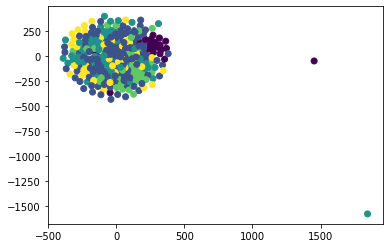

In [29]:
# Plot the clusters in the t-SNE space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


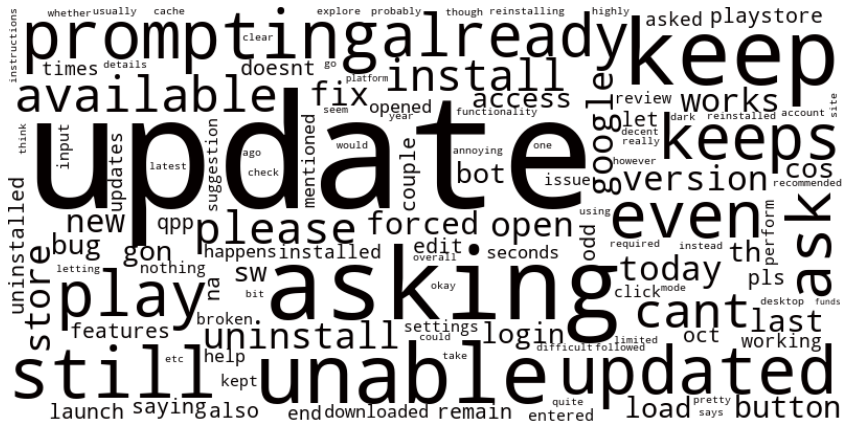

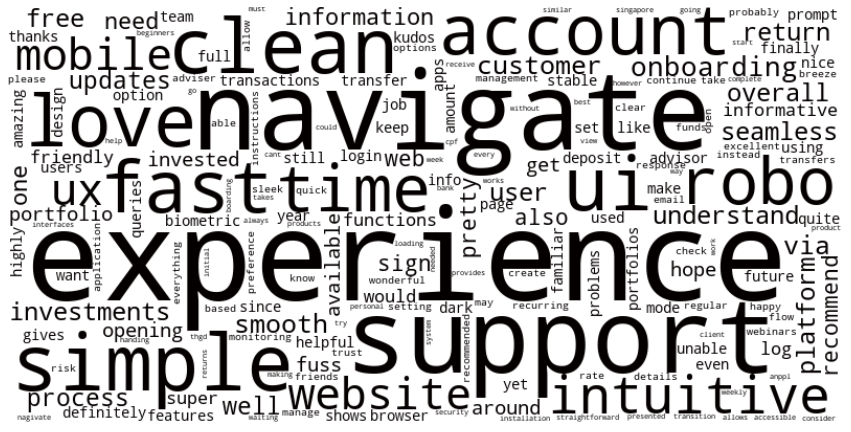

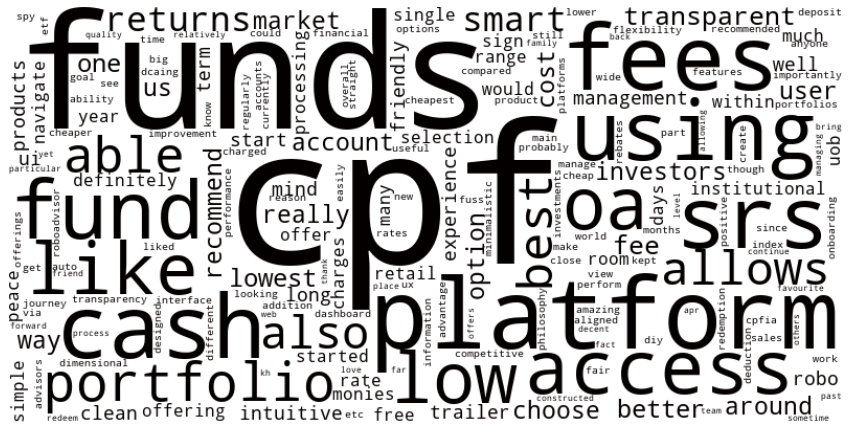

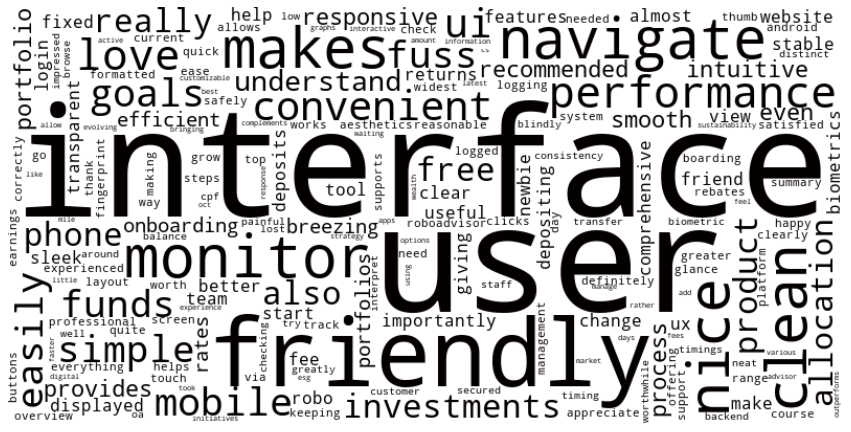

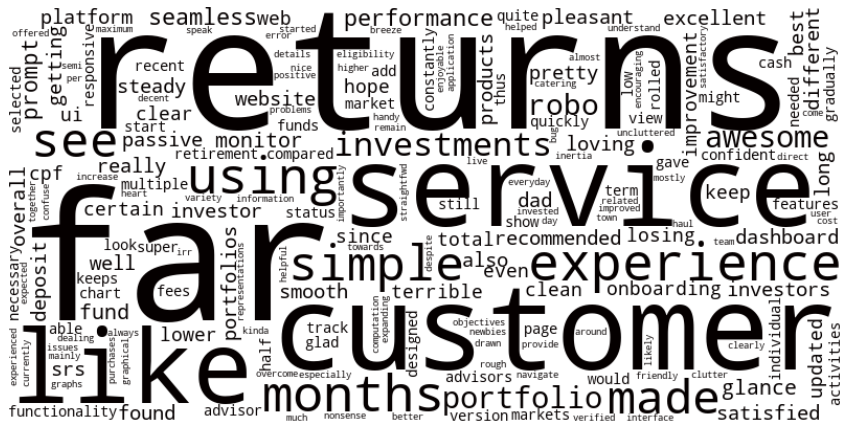

In [30]:
# Get the cluster assignments for each document
clusters = kmeans.labels_

# Create a dictionary of the words and their TF-IDF scores for each cluster
word_scores = {}
for i in range(kmeans.n_clusters):
    # Get the indices of the documents in the current cluster
    cluster_indices = [j for j, x in enumerate(clusters) if x == i]
    # Get the TF-IDF scores for the words in the current cluster
    cluster_scores = X[cluster_indices, :].sum(axis=0)
    # Convert the TF-IDF scores to a dictionary
    word_scores[i] = dict(zip(vectorizer.get_feature_names(), cluster_scores.flat))

# Create a word cloud for each cluster
for i in range(kmeans.n_clusters):
    wordcloud = WordCloud(background_color="white", width=800, height=400)
    wordcloud.generate_from_frequencies(word_scores[i])
    # set the word color to black
    wordcloud.recolor(color_func = black_color_func)
    # set the figsize
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()